<a href="https://colab.research.google.com/github/lynseybwisa/IBM-Machine-Learning/blob/develop/Data_Cleaning_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#installing dependencies

In [3]:
! pip install pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 7.1 MB/s 
     |████████████████████████████████| 15.7 MB 58.8 MB/s 
     |████████████████████████████████| 208 kB 56.1 MB/s 
     |████████████████████████████████| 11.3 MB 56.5 MB/s 
     |████████████████████████████████| 9.7 MB 61.7 MB/s 
     |████████████████████████████████| 965 kB 55.4 MB/s 
     |████████████████████████████████| 43 kB 2.8 MB/s 
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matpl

In [4]:
! python -m pip uninstall matplotlib
! pip install matplotlib==3.1.3

/bin/bash: y: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 7.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.0
    Uninstalling matplotlib-3.5.0:
      Successfully uninstalled matplotlib-3.5.0


In [5]:
import warnings 
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

#Reading and understanding the data

In [7]:
housing = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data1.tsv", sep='\t')
housing.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
6,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
7,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
8,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
9,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


In [8]:
#find more info about the features of the columns and the types using info() method
# we have 2931 entries and 82 features
# non-null count shows number of non-null entries, if 2931, then no missing values
#SalePrice is our target and the rest are predictors
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

The `describe()` function reveals the statistical information about the numeric attributes

In [9]:
#use describe() to show count, mean, min and max of sale price attribute
#min val is > 0
#big diff btwn min val & 25%
#the data might not be normally distributed(assumption for linear regression analysis)
housing["SalePrice"].describe()

count      2931.000000
mean     180807.729785
std       79875.557267
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

describe all categories of the 'Sale Condition' attribute using `value_counts()`

Normal appears 2414 times, partial 245, abnorml 190
, family 46, alloca 24, adjland 12 and this doesnt have null

In [10]:
housing["Sale Condition"].value_counts()

Normal     2414
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: Sale Condition, dtype: int64

#Feature selection with correlations

it is useful to establish a correlation between the response variable (in our case the sale price) and other predictor variables, as some of them might not have any major impact in determining the price of the house.  
 Building pair plots, scatter plots, heat maps, and a correlation matrixes are the most common ways. 
 
 Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.


In [11]:
#return data based on column type
hous_num = housing.select_dtypes(include = ['float64', 'int64'])

Use the `corr()` function to list the top features based on the [pearson correlation coefficient] (measures how closely two sequences of numbers are correlated). 

In [12]:
hous_num_corr = hous_num.corr()['SalePrice'][:-1] # -1 means that the latest row is SalePrice

In [13]:
top_features = hous_num_corr[abs(hous_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5

In [14]:
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 11 strongly correlated values with SalePrice:
Overall Qual      0.799226
Gr Liv Area       0.706791
Garage Cars       0.647891
Garage Area       0.640411
Total Bsmt SF     0.632270
1st Flr SF        0.621672
Year Built        0.558340
Full Bath         0.545339
Year Remod/Add    0.532664
Garage Yr Blt     0.526808
Mas Vnr Area      0.508277
Name: SalePrice, dtype: float64


Above, there are 11 features, with coefficients greater than 0.5, that are strongly correlated with the sale price.

use seaborns `sns.pairplot()` function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data.

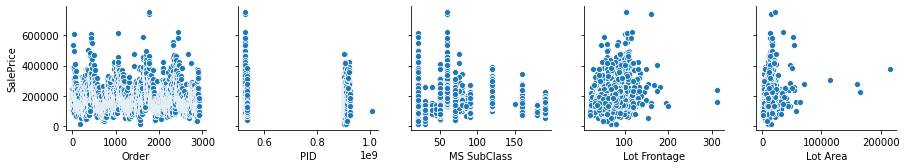

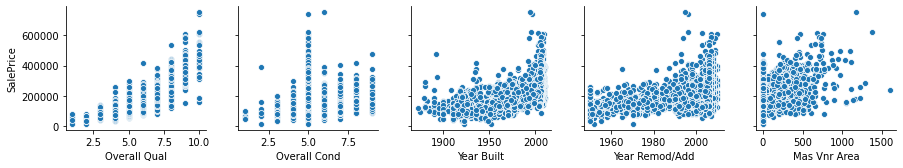

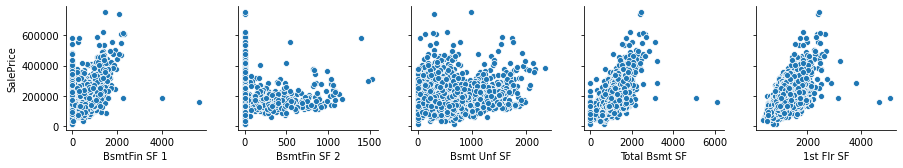

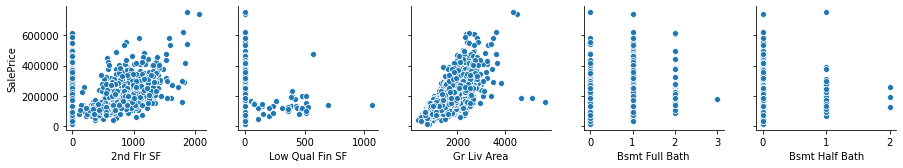

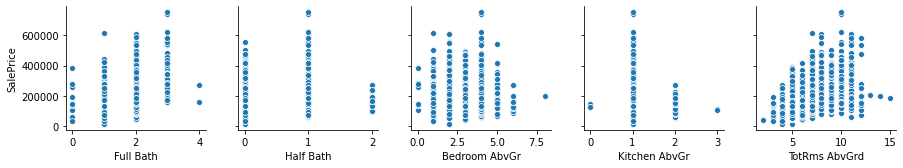

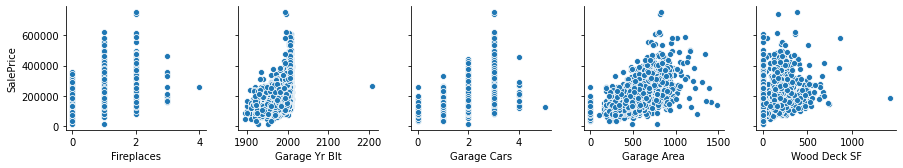

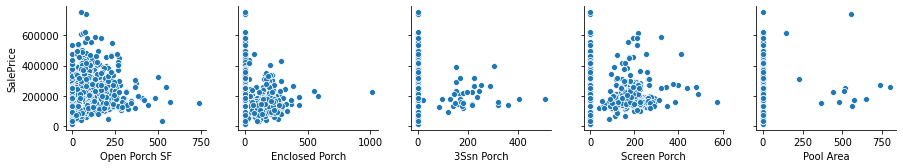

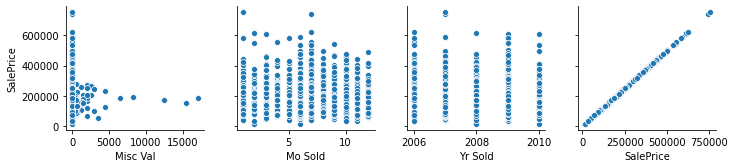

In [17]:
for i in range(0, len(hous_num.columns), 5):
    sns.pairplot(data=hous_num,
                x_vars=hous_num.columns[i:i+5],
                y_vars=['SalePrice'])

#Log Transformation

In this section, we are going to inspect whether our 'SalePrice' data are normally distributed. The assumption of the normal distribution must be met in order to perform any type of regression analysis. There are several ways to check for this assumption, however here, we will use the visual method, by plotting the 'SalePrice' distribution using the `distplot()` function from the `seaborn` library.

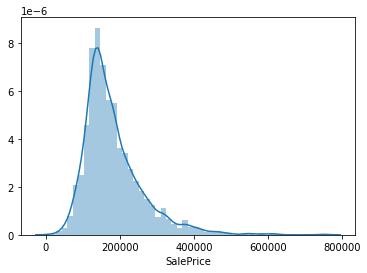

In [18]:
sp_untransformed = sns.distplot(housing['SalePrice'])